<a href="https://colab.research.google.com/github/caleb-stewart/A-Z_Machine-Learning/blob/main/thompson_sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Thompson Sampling

## Importing the libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [3]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')
# Dataset is 10 different ads
# Each row is 1 or 0, yes or no if a user would click on the ad
#   (Obviously a simulation dataset)


## Implementing Thompson Sampling

In [43]:
# implementation is very similar to UCB
import random
N = 500 # The total number of users
d = 10 # number of ads displayed
ads_selected = [] # List of all adds shown
numbers_of_rewards_0 = [0] * d
numbers_of_rewards_1 = [0] * d
total_reward = 0

for i in range(N):
  ad = 0
  highest_random = 0

  for j in range(d):
    # Step 2. Get a random draw from the distribution
    random_beta = random.betavariate(numbers_of_rewards_1[j] + 1, numbers_of_rewards_0[j] + 1)

    # Replace the max random distribution
    if random_beta > highest_random:
      highest_random = random_beta
      ad = j

  # Select the highest ad distribution for this round, and increment what is needed
  ads_selected.append(ad)
  if dataset.values[i, ad] == 1:
    numbers_of_rewards_1[ad] += 1
  else:
    numbers_of_rewards_0[ad] += 0

  total_reward += dataset.values[i, ad]

## Visualising the results - Histogram

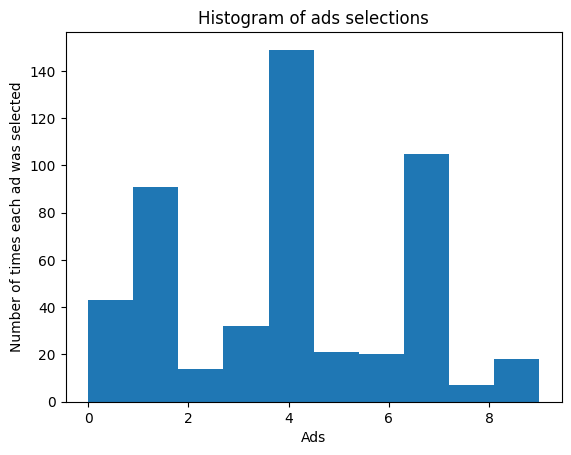

In [44]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

# You can see that this algorithm is based on probability, and no two runs will be the same
# With a low as 500 runs we can see that ad 4 was selected to have the highest distribution